# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('exch_rates.csv')
data.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


In [2]:
# your code here
data.columns=['date', 'euro', 'dollar','krone']
data.date=pd.to_datetime(data.date)
data=data.set_index('date')


Plot the three exchange rates in one plot

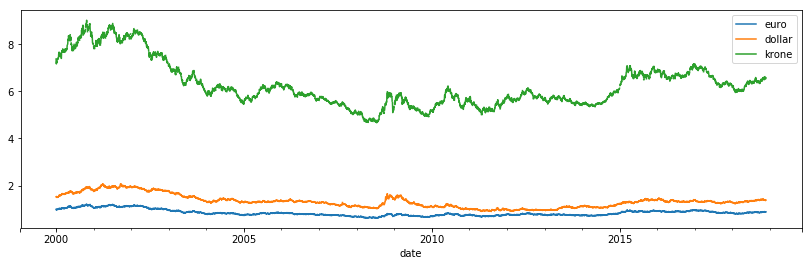

In [3]:
# your code here

data.plot(figsize=(14,4))

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [4]:
# your code here
data.corr()

,euro,dollar,krone
euro,1.000000,0.883181,0.999952
dollar,0.883181,1.000000,0.882513
krone,0.999952,0.882513,1.000000


In [5]:
#  they all seems strongly correlated 

### What is your conclusion here? You might want to use outside resources to understand what's going on.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1184c9780>,
      dtype=object)

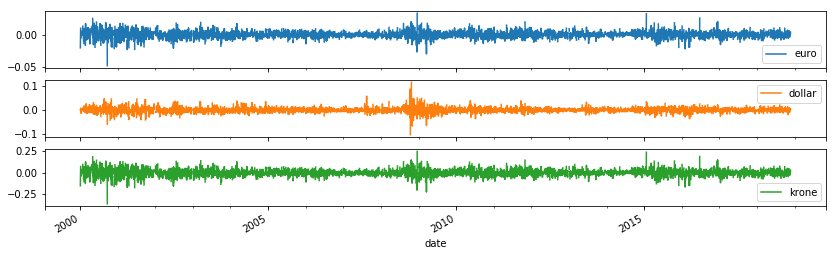

In [6]:
data_diff=data.diff(periods=1)
# your code here
data_diff.plot(figsize=(14,4), subplots=True)

In [7]:
# your code here

In [8]:
# your code here

### Explain what's going on

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [9]:
# your code here

euro = data[['euro']]
euro_shift_1 = euro.shift(periods=1)
euro_shift_1.head()

lag_1= pd.concat([euro, euro_shift_1], axis=1)
lag_1.columns=['euro', 'euro_shift']
lag_1.corr()




,euro,euro_shift
euro,1.000000,0.999146
euro_shift,0.999146,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1178418d0>,
      dtype=object)

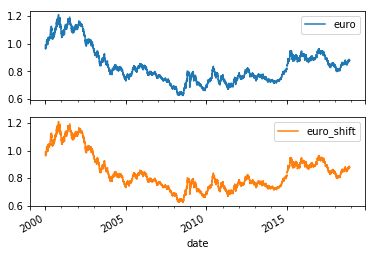

In [10]:
# your code here

lag_1.plot(subplots=True)

In [11]:
# your code here
#they are exact same

Repeat this, but for a "lag 5 autocorrelation"

In [12]:
# your code here

euro = data[['euro']]
euro_shift_5 = euro.shift(periods=5)
euro_shift_5.head()

lag_5= pd.concat([euro, euro_shift_5], axis=1)
lag_5.columns=['euro', 'euro_shift']
lag_5.corr()


,euro,euro_shift
euro,1.000000,0.997518
euro_shift,0.997518,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1178419b0>,
      dtype=object)

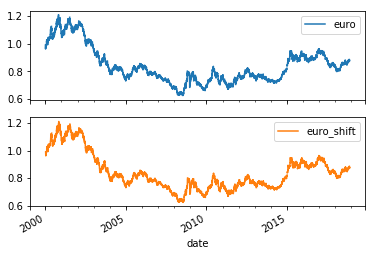

In [13]:
# your code here
lag_5.plot(subplots=True)

In [14]:
# lag 5 did not make any difference either. i will try 50 

euro = data[['euro']]
euro_shift_500 = euro.shift(periods=500)
euro_shift_500.head()

lag_500= pd.concat([euro, euro_shift_500], axis=1)
lag_500.columns=['euro', 'euro_shift']
lag_500.corr()


,euro,euro_shift
euro,1.000000,0.718665
euro_shift,0.718665,1.000000


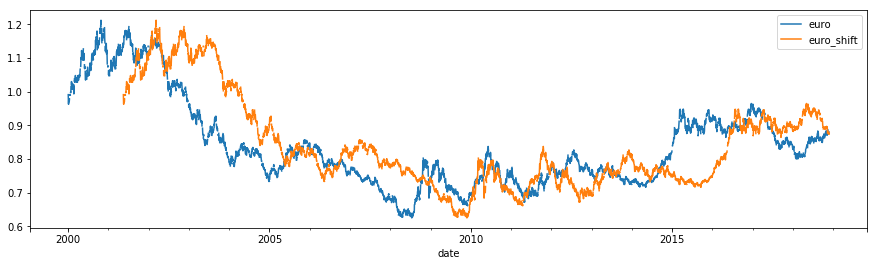

In [15]:
lag_500.plot(subplots=False, figsize=(15,4))

In [16]:
# I do not get this

### What's your conclusion here?

Knowing this, let's plot the ACF now.

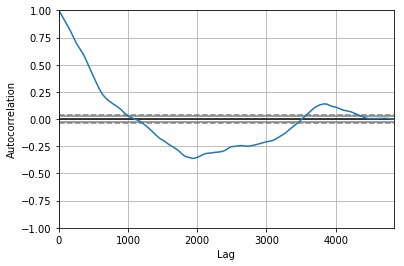

In [18]:
# your code here
euro=euro.dropna()

pd.plotting.autocorrelation_plot(euro)


The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

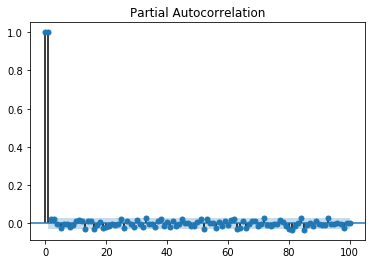

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf


plot_pacf(euro.dropna(), lags = 100, method='ywm');

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [24]:
# your code here

data=pd.read_csv('passengers.csv')
data.head()


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [27]:
# your code here

data.date=pd.to_datetime(data.Month)
data=data.set_index('Month')

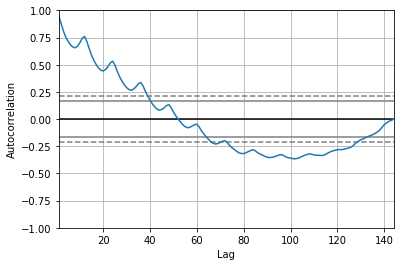

In [29]:
# your code here


pd.plotting.autocorrelation_plot(data['#Passengers'])

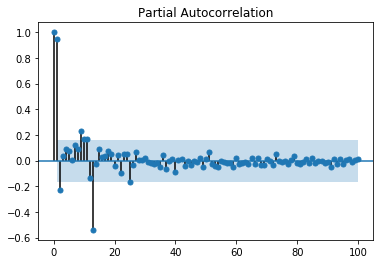

In [30]:
# your code here
plot_pacf(data['#Passengers'], lags = 100, method='ywm');

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [31]:
# your code here
data=pd.read_csv('NYSE_monthly.csv')
data.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [32]:
# your code here
data.date=pd.to_datetime(data.Month)
data=data.set_index('Month')

/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


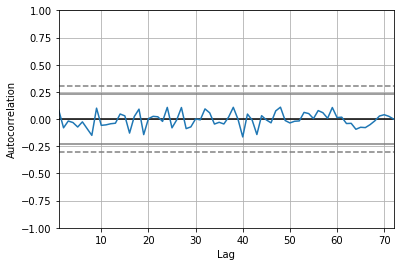

In [34]:
pd.plotting.autocorrelation_plot(data['monthly_return'])

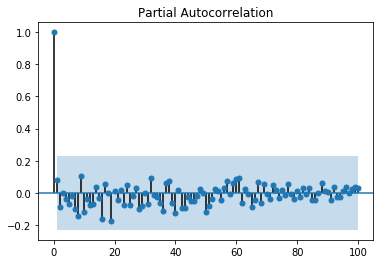

In [35]:
plot_pacf(data['monthly_return'], lags = 100, method='ywm');

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!